Анализ выполнен в рамках учебно-аналитического кейса на синтетических данных. Эксперимент направлен на сравнение воздействия двух вирусных воздействий — G-вируса и T-вируса — на биологический показатель объёма вирусной ткани в организме (метрика VIRUS).

Экспериментальные наблюдения сформированы на симуляциях для трёх городов (Москва, Нью-Йорк, Токио). Участники эксперимента были разделены на две группы: группа A подвергалась воздействию G-вируса, группа B — воздействию T-вируса.

In [69]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('/Users/elenatsoi/Desktop/A:B тесты /воркшоп /Umbrella_experiment.csv',sep=';')
df.head()

,ID_SIMPERS,VIRUS,ID_GROUP,GENDER,ID_CITY
0,1007416,"3,58",B,F,New York
1,1001664,"5,8",A,M,Moscow
2,1007900,"3,37",B,F,Tokyo
3,1006219,"3,81",B,M,New York
4,1005224,"4,32",A,M,New York


In [70]:
df.info()
df.isna().sum()
df=df.dropna()
df.isna().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9537 entries, 0 to 9536
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID_SIMPERS  9537 non-null   int64 
 1   VIRUS       9502 non-null   object
 2   ID_GROUP    9517 non-null   object
 3   GENDER      9517 non-null   object
 4   ID_CITY     9537 non-null   object
dtypes: int64(1), object(4)
memory usage: 372.7+ KB


ID_SIMPERS    0
VIRUS         0
ID_GROUP      0
GENDER        0
ID_CITY       0
dtype: int64

In [71]:
df.duplicated().sum()
df=df.drop_duplicates()
df.duplicated().sum()

np.int64(0)

In [72]:
df.head()

,ID_SIMPERS,VIRUS,ID_GROUP,GENDER,ID_CITY
0,1007416,"3,58",B,F,New York
1,1001664,"5,8",A,M,Moscow
2,1007900,"3,37",B,F,Tokyo
3,1006219,"3,81",B,M,New York
4,1005224,"4,32",A,M,New York


In [73]:
df['VIRUS']=df['VIRUS'].str.replace(',','.')
df['VIRUS']=pd.to_numeric(df['VIRUS'])


In [74]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 9347 entries, 0 to 9536
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID_SIMPERS  9347 non-null   int64  
 1   VIRUS       9347 non-null   float64
 2   ID_GROUP    9347 non-null   object 
 3   GENDER      9347 non-null   object 
 4   ID_CITY     9347 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 438.1+ KB


,ID_SIMPERS,VIRUS
count,9.347000e+03,9347.000000
mean,1.004674e+06,4.585393
std,2.698473e+03,0.767181
min,1.000001e+06,2.900000
25%,1.002338e+06,4.050000
50%,1.004674e+06,4.590000
75%,1.007010e+06,5.140000
max,1.009402e+06,6.000000


In [75]:
# группировка по группам, городам, и половому признаку 
df.groupby(['ID_GROUP', 'GENDER','ID_CITY'],as_index=False)['ID_SIMPERS'].count()

,ID_GROUP,GENDER,ID_CITY,ID_SIMPERS
0,A,F,Moscow,1292
1,A,F,New York,747
2,A,F,Paris,1
3,A,F,Tokyo,399
4,A,M,Moscow,1068
5,A,M,New York,760
6,A,M,Paris,4
7,A,M,Tokyo,391
8,B,F,Moscow,1325
9,B,F,New York,690


In [76]:
from scipy.stats import ttest_ind


In [77]:
s,p=ttest_ind(df[df['ID_GROUP']=='B']['VIRUS'],df[df['ID_GROUP']=='A']['VIRUS'])
print(p)

0.10611819933448587


In [78]:
print(df[df['ID_GROUP']=='B']['VIRUS'].mean())
print(df[df['ID_GROUP']=='A']['VIRUS'].mean())

4.5981843033635
4.572538908510724


**При сравнении групп A и B статистически значимых различий по метрике VIRUS выявлено не было (p-value > 0.05). Таким образом, в рамках данного эксперимента нет оснований утверждать, что воздействие T-вируса отличается от G-вируса на уровне всей совокупности.**


In [79]:
# воздействие этих двух вирусов в разрезе городов и гендера.
# Результаты стратифицированного анализа по городам и полу носят описательный характер и не интерпретируются
# как строгие статистические выводы из-за множественных сравнений.

alpha=0.05
for i in df['ID_CITY'].unique():
    print()
    print(i)
    
    for k in df['GENDER'].unique():
        print(k)
        s,p=ttest_ind(df[(df['ID_GROUP']=='B') & (df['ID_CITY']==i)&(df['GENDER']==k)]['VIRUS'],
                      df[(df['ID_GROUP']=='A') & (df['ID_CITY']==i)&(df['GENDER']==k)]['VIRUS'])
        
        m1=df[(df['ID_GROUP']=='B') & (df['ID_CITY']==i)&(df['GENDER']==k)]['VIRUS'].mean()
        m2=df[(df['ID_GROUP']=='A') & (df['ID_CITY']==i)&(df['GENDER']==k)]['VIRUS'].mean()
        if p<alpha:
            print(f"Между сравниваемыми группами выявлено статистически значимое различие "
                  f"по анализируемой метрике (p-value < {alpha}). "
            f"Среднее значение показателя в группе B составляет {round(m1,2)}, "
            f"в группе A — {round(m2,2)}.")   
        else:
            print( f"Различия между группами A и B по анализируемой метрике "
                  f"не являются статистически значимыми (p-value ≥ {alpha}). "
            f"Средние значения: группа B — {round(m1,2)}, группа A — {round(m2,2)}.")
            print()
    
        
                  


New York
F
Различия между группами A и B по анализируемой метрике не являются статистически значимыми (p-value ≥ 0.05). Средние значения: группа B — 4.5, группа A — 4.47.

M
Между сравниваемыми группами выявлено статистически значимое различие по анализируемой метрике (p-value < 0.05). Среднее значение показателя в группе B составляет 4.66, в группе A — 4.5.

Moscow
F
Различия между группами A и B по анализируемой метрике не являются статистически значимыми (p-value ≥ 0.05). Средние значения: группа B — 4.7, группа A — 4.7.

M
Различия между группами A и B по анализируемой метрике не являются статистически значимыми (p-value ≥ 0.05). Средние значения: группа B — 4.59, группа A — 4.6.


Tokyo
F
Различия между группами A и B по анализируемой метрике не являются статистически значимыми (p-value ≥ 0.05). Средние значения: группа B — 4.46, группа A — 4.55.

M
Различия между группами A и B по анализируемой метрике не являются статистически значимыми (p-value ≥ 0.05). Средние значения: групп

/opt/anaconda3/lib/python3.13/site-packages/scipy/_lib/deprecation.py:234: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  return f(*args, **kwargs)


In [80]:
df1 = pd.read_csv('/Users/elenatsoi/Desktop/A:B тесты /воркшоп /Umbrella_Data.csv',sep=';')


In [12]:
df_merge=df.merge(df1, on='ID_SIMPERS')


,ID_SIMPERS,VIRUS,ID_GROUP,GENDER,ID_CITY,PULSE
0,1007416,3.58,B,F,New York,81
1,1001664,5.80,A,M,Moscow,78
2,1007900,3.37,B,F,Tokyo,86
3,1006219,3.81,B,M,New York,82
4,1005224,4.32,A,M,New York,130
...,...,...,...,...,...,...
9334,1001874,3.95,B,M,Moscow,64
9335,1007185,5.99,B,F,New York,98
9336,1001115,6.00,A,M,Moscow,84
9337,1001549,4.85,A,F,Moscow,109


#### Иследуем взаимосвязь между средним пульсом человека (можно взять из файла Umbrella_Data) и интенсивностью распространения G и T-вирусов.


In [81]:
df_merge['virus_bin'] = pd.qcut(df_merge['VIRUS'], q=4, labels=[
    'Low', 'Medium-low', 'Medium-high', 'High'
])


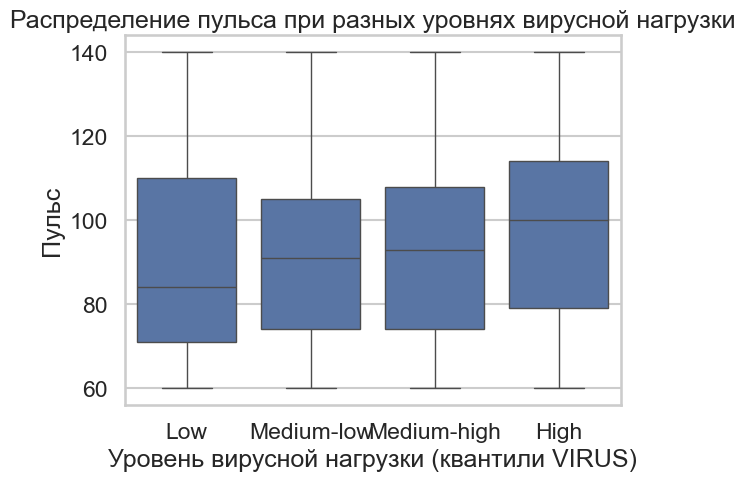

In [82]:
sns.boxplot(
    data=df_merge,
    x='virus_bin',
    y='PULSE')

plt.title('Распределение пульса при разных уровнях вирусной нагрузки')
plt.xlabel('Уровень вирусной нагрузки (квантили VIRUS)')
plt.ylabel('Пульс')
plt.show()


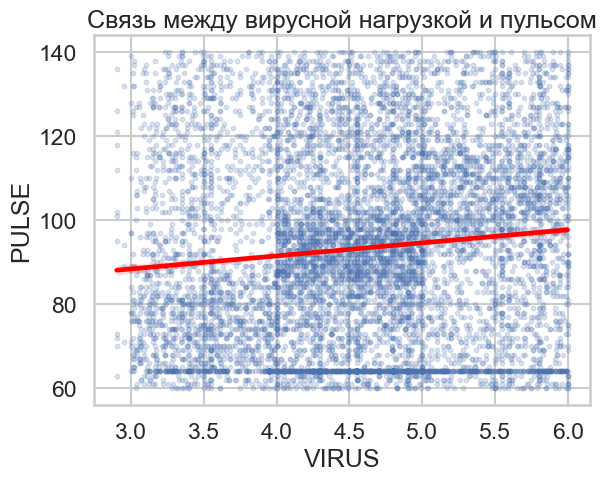

In [83]:
sns.regplot(
    data=df_merge,
    x='VIRUS',
    y='PULSE',
    scatter_kws={'alpha': 0.2, 's': 10},
    line_kws={'color': 'red'}
)

plt.title('Связь между вирусной нагрузкой и пульсом')
plt.xlabel('VIRUS')
plt.ylabel('PULSE')
plt.show()


In [84]:

s,p=pearsonr(df_merge['VIRUS'],df_merge['PULSE'])

print(f"Корреляция между показателем VIRUS и пульсом статистически значима "
    f"(p-value < 0.05), однако её величина крайне мала (r = {s:.3f}), "
    f"что указывает на слабую линейную связь.")


Корреляция между показателем VIRUS и пульсом статистически значима (p-value < 0.05), однако её величина крайне мала (r = 0.107), что указывает на слабую линейную связь.


### Корреляция на уровне всей выборки

На уровне всей выборки между показателем VIRUS и пульсом выявлена статистически значимая корреляция (p-value < 0.05). При этом величина коэффициента корреляции крайне мала (r ≈ 0.1), что указывает на слабую линейную связь между показателями.

Несмотря на статистическую значимость, практическая сила выявленной связи невелика и не позволяет говорить о существенной зависимости между вирусной нагрузкой и пульсом.   
Визуальный анализ распределений подтверждает отсутствие выраженных различий
пульса между уровнями вирусной нагрузки.


In [85]:
s,p=pearsonr(df_merge[df_merge['ID_GROUP']=='B']['VIRUS'],df_merge[df_merge['ID_GROUP']=='B']['PULSE'])

print(f"В группе B наблюдается более выраженная, но всё ещё умеренная корреляция между пульсом и показателем VIRUS(r = {s:.3f}), "
    f"что указывает на слабую линейную связь.")

В группе B наблюдается более выраженная, но всё ещё умеренная корреляция между пульсом и показателем VIRUS(r = 0.259), что указывает на слабую линейную связь.


### Корреляция в группе B (T-вирус)

В группе B обнаружена статистически значимая положительная корреляция между показателем VIRUS и пульсом (p-value < 0.05). Значение коэффициента корреляции выше, чем на уровне всей выборки (r ≈ 0.26), однако остаётся в диапазоне слабой–умеренной связи.

Полученный результат указывает на наличие более выраженной ассоциации между физиологическим состоянием и вирусной нагрузкой в группе, подвергшейся воздействию T-вируса, однако не позволяет делать выводы о причинно-следственной зависимости.


In [86]:
s,p=pearsonr(df_merge[df_merge['ID_GROUP']=='A']['VIRUS'],df_merge[df_merge['ID_GROUP']=='A']['PULSE'])

print(f"В группе A статистически значимая связь не выявлена(r = {s:.3f}), ")

В группе A статистически значимая связь не выявлена(r = 0.022), 


### Корреляция в группе A (G-вирус)

В группе A статистически значимая корреляция между показателем VIRUS и пульсом не выявлена (p-value ≥ 0.05). Значение коэффициента корреляции близко к нулю, что указывает на отсутствие линейной связи между рассматриваемыми показателями в рамках данной группы.


Следует отметить, что корреляционный анализ не позволяет делать выводы о причинно-следственных связях. Полученные результаты отражают лишь степень линейной ассоциации между показателями в рамках синтетических данных.


## Итоговый Summary

В рамках учебно-аналитического кейса был проведён анализ синтетических экспериментальных данных с целью сравнения воздействия G-вируса и T-вируса по биологическому показателю объёма вирусной ткани в организме (VIRUS).

### Основные результаты

- При сравнении групп A (G-вирус) и B (T-вирус) статистически значимых различий по показателю VIRUS на уровне всей выборки не выявлено (p-value ≥ 0.05), несмотря на незначительное различие средних значений.
- Стратифицированный анализ в разрезе городов и гендера не выявил устойчивых статистически подтверждённых различий между группами; результаты в этих срезах носят описательный характер из-за множественных сравнений.
- Анализ корреляции между показателем VIRUS и физиологическим показателем PULSE показал наличие статистически значимой, но крайне слабой линейной связи на уровне всей выборки.
- В группе B наблюдается более выраженная, но всё ещё слабая–умеренная корреляция между VIRUS и PULSE, тогда как в группе A статистически значимая связь не выявлена.

### Вывод

Полученные результаты не подтверждают наличие устойчивого отличия воздействия T-вируса от G-вируса по анализируемому показателю в рамках данного эксперимента. Выявленные корреляционные зависимости имеют ограниченную силу и не позволяют делать выводы о причинно-следственных связях.

### Ограничения

- данные являются синтетическими и не отражают реальный биологический или бизнес-процесс;
- анализ носит учебно-методический и описательный характер;
- результаты валидны исключительно в рамках заданных симуляционных условий.
